In [1]:
import pandas as pd
import numpy as np
import sklearn
import scipy

In [2]:
# Loading the data from the Case Study GitHub
# df = pd.read_csv("https://raw.githubusercontent.com/eklavyasaxena/Advances-in-Data-Sciences-and-Architecture/master/ADS_CaseStudy_2/Data_for_EnergyCaseStudy/energydata_complete.csv")
df_loaded = pd.read_csv(r"C:\Users\sachi.mehta\Data Science\Energy consumption\Model2\Machine-Learning-with-Energy-Dataset-master\Data_for_EnergyCaseStudy\energydata_complete.csv")
df = df_loaded
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S', utc=True)
all_columns = df.columns.tolist()
df['NSM'] = df.date.apply(lambda x: x.hour*3600 + x.minute*60 +x.second)
df['day_of_week'] = df.date.apply(lambda x: x.dayofweek)
df['week_status'] = df.day_of_week.apply(lambda x: 0 if (x == 5 or x == 6) else 1)
df.date.nunique() == df.shape[0]
df.apply(lambda x: sum(x.isnull()), axis=0)
df[['Appliances', 'lights']].describe().astype(int)
df[['Appliances', 'lights']].apply(scipy.stats.skew)
df[['Appliances', 'lights']].apply(np.log).apply(scipy.stats.kurtosis)
df[['T6', 'T_out', 'RH_6', 'RH_out']].describe().astype(int)
df[['T6', 'T_out', 'RH_6', 'RH_out']].apply(scipy.stats.skew)
df[['T6', 'T_out', 'RH_6', 'RH_out']].apply(scipy.stats.kurtosis)
df[['T6', 'T_out', 'RH_6', 'RH_out']].apply(np.log).apply(scipy.stats.skew)
df[['T6', 'T_out', 'RH_6', 'RH_out']].apply(np.log).apply(scipy.stats.kurtosis)
consumption_bins = ['Very Low', 'Low', 'Medium', 'High', 'Very high']
df['Appliances_bin'] = pd.qcut(df.Appliances, 5, consumption_bins)
bin_ranges = pd.qcut(df.Appliances, 5).unique()
bin_ranges
df = df.drop(['Appliances_bin'],axis=1)
df_describe = df.describe().T
df_describe['Interquartile Range'] = 1.5*(df_describe['75%'] - df_describe['25%'])
df_describe['Major Outlier'] = (df_describe['75%'] + df_describe['Interquartile Range'])
df_describe['Minor Outlier'] = (df_describe['25%'] - df_describe['Interquartile Range'])
df_describe

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1082: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)


,count,mean,std,min,25%,50%,75%,max,Interquartile Range,Major Outlier,Minor Outlier
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000,75.000000,175.000000,-25.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000,2.760000,25.360000,18.000000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000,8.600000,51.666667,28.733333
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667,4.065000,25.565000,14.725000
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667,8.040000,51.300000,29.860000
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000,3.750000,27.040000,17.040000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333,7.290000,49.050000,29.610000
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000,3.855000,25.955000,15.675000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000,9.940000,52.096667,25.590000


In [4]:
def remove_outlier(df, variable):
    major_o = df_describe.loc[variable,'Major Outlier']
    minor_o = df_describe.loc[variable,'Minor Outlier']
    df = df.drop(df[(df[variable]>major_o) | (df[variable]<minor_o)].index)
    return df

In [5]:
outlier_column_list = [x for x in all_columns 
                       if x not in ('date', 'Appliances', 'lights', 'RH_6', 'RH_out', 'Windspeed', 'Visibility', 'rv1', 'rv2')]
for column_name in outlier_column_list:
    df = remove_outlier(df, column_name)

In [6]:
# Percentage of Data Dropped
((df_loaded.shape[0] - df.shape[0])/df_loaded.shape[0])*100

14.83151760831011

In [7]:
# Exporting the cleaned dataset
#df.to_csv('energydata_complete_cleaned.csv', index=False)

In [8]:
df_loaded = pd.read_csv(r"C:\Users\sachi.mehta\Data Science\Energy consumption\Model2\energydata_complete_cleaned.csv")
df = df_loaded

In [9]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,day_of_week,week_status
0,2016-01-11 22:20:00+00:00,400,20,21.6,44.766667,20.890000,44.223333,20.5000,45.933333,19.696667,...,735.966667,87.666667,6.333333,40.0,3.733333,24.677065,24.677065,80400,0,1
1,2016-01-11 22:30:00+00:00,390,30,21.6,44.560000,20.963333,43.963333,20.5000,45.790000,20.096667,...,736.050000,87.500000,6.500000,40.0,3.750000,9.310880,9.310880,81000,0,1
2,2016-01-11 22:40:00+00:00,240,20,21.6,44.360000,21.000000,43.833333,20.5000,45.730000,20.596667,...,736.133333,87.333333,6.666667,40.0,3.766667,41.368666,41.368666,81600,0,1
3,2016-01-11 22:50:00+00:00,60,20,21.6,44.200000,21.000000,43.700000,20.5000,45.590000,20.996667,...,736.216667,87.166667,6.833333,40.0,3.783333,33.423337,33.423337,82200,0,1
4,2016-01-11 23:00:00+00:00,60,20,21.6,44.200000,21.000000,43.590000,20.4175,45.545000,21.166667,...,736.300000,87.000000,7.000000,40.0,3.800000,39.711993,39.711993,82800,0,1


In [10]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,day_of_week,week_status
count,16808.000000,16808.000000,16808.000000,16808.000000,16808.000000,16808.000000,16808.000000,16808.000000,16808.000000,16808.000000,...,16808.000000,16808.000000,16808.000000,16808.000000,16808.000000,16808.000000,16808.000000,16808.000000,16808.000000,16808.000000
mean,93.776773,3.522727,21.556967,39.982769,20.040407,40.498662,22.133051,39.064144,20.725292,38.736855,...,755.827755,80.652536,4.053424,38.411871,3.413021,25.046649,25.046649,40848.155640,2.921228,0.737446
std,100.164810,7.629485,1.408360,3.625608,1.778716,3.708957,1.778750,3.130073,1.818792,4.168480,...,7.042373,13.527929,2.466052,11.874992,3.946533,14.487974,14.487974,24839.139841,1.975149,0.440035
min,10.000000,0.000000,18.000000,31.426667,16.200000,29.890000,17.790000,29.800000,15.690000,29.727143,...,735.933333,32.000000,0.000000,1.000000,-6.500000,0.005322,0.005322,0.000000,0.000000,0.000000
25%,50.000000,0.000000,20.700000,37.230000,18.760000,38.000000,20.760000,36.790000,19.533333,35.400000,...,751.233333,71.666667,2.000000,29.000000,0.733333,12.584626,12.584626,19200.000000,1.000000,0.000000
50%,60.000000,0.000000,21.500000,39.400000,19.790000,40.425833,22.066667,38.400000,20.600000,38.200000,...,756.200000,84.000000,3.666667,40.000000,3.150000,24.942051,24.942051,39600.000000,3.000000,1.000000
75%,90.000000,0.000000,22.390000,42.530000,21.166667,43.169500,23.200000,41.000000,21.856667,41.590000,...,761.100000,91.500000,5.666667,40.000000,6.066667,37.634201,37.634201,61800.000000,5.000000,1.000000
max,1080.000000,50.000000,25.356667,51.633333,25.560000,51.200000,27.035818,49.030000,25.926667,51.063333,...,772.300000,100.000000,14.000000,66.000000,14.950000,49.996530,49.996530,85800.000000,6.000000,1.000000


In [11]:
week_status = pd.get_dummies(df['week_status'], prefix = 'week_status')
day_of_week = pd.get_dummies(df['day_of_week'], prefix = 'day_of_week')
#['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#['Weekend', 'Weekday']

# Concat above dummies variable dataframe to the main dataframe
df = pd.concat((df,week_status),axis=1)
df = pd.concat((df,day_of_week),axis=1)

# Drop the WeekStatus and Day_of_week column
df = df.drop(['week_status','day_of_week'],axis=1)

In [12]:
df = df.rename(columns={'week_status_0': 'Weekend', 'week_status_1': 'Weekday',
                   'day_of_week_0': 'Monday', 'day_of_week_1': 'Tuesday', 'day_of_week_2': 'Wednesday',
                  'day_of_week_3': 'Thursday', 'day_of_week_4': 'Friday', 'day_of_week_5': 'Saturday',
                  'day_of_week_6': 'Sunday'})

In [13]:
df = df.drop(['T7', 'T6', 'rv1','date'],axis=1)

In [14]:
df['Appliances'] = df['Appliances'] + df['lights']
df = df.drop(['lights'],axis=1)


In [15]:
# Exporting the transformed dataset
df.to_csv('energydata_complete_transformed.csv', index=False)

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [17]:
df_loaded = pd.read_csv(r"C:\Users\sachi.mehta\Data Science\Energy consumption\Model2\energydata_complete_transformed.csv")
df = df_loaded

# Creating Metrics Dataframe
metrics_df = pd.DataFrame(index = ['RSquared_train', 'RSquared_test', 'RMS_train', 'RMS_test', 'MAE_train', 'MAE_test', 'MAPE_train', 'MAPE_test'])

In [18]:
X = df.drop(['Appliances'],axis=1)
y = df['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
# Function to print metrics
def print_training_metrics(**kwargs):
    for name, value in kwargs.items():
        value = float("{0:.2f}".format(value))
        print('{0} for Training Dataset is: {1}'.format(name, value))
def print_testing_metrics(**kwargs):
    for name, value in kwargs.items():
        value = float("{0:.2f}".format(value))
        print('{0} for Testing Dataset is: {1}'.format(name, value))

# Function to print and add metrics to dataframe
def print_metrics(df, model, r2_train, rms_train, mae_train, mape_train, r2_test, rms_test, mae_test, mape_test):
    #print('R Squared for Training Data:',float("{0:.2f}".format(r2_train)))
    #print('R Squared for Testing Data:',float("{0:.2f}".format(r2_test)))
    #print('RMS for Training Data:',float("{0:.2f}".format(rms_train)))
    #print('RMS for Testing Data:',float("{0:.2f}".format(rms_test)))
    #print('MAE for Training Data:',float("{0:.2f}".format(mae_train)))
    #print('MAE for Testing Data:',float("{0:.2f}".format(mae_test)))
    #print('MAPE for Training Data:',float("{0:.2f}".format(mape_train)))
    #print('MAPE for Testing Data:',float("{0:.2f}".format(mape_test)))
    df[model] = [float("{0:.2f}".format(r2_train)), float("{0:.2f}".format(r2_test)),
                 float("{0:.2f}".format(rms_train)), float("{0:.2f}".format(rms_test)),
                 float("{0:.2f}".format(mae_train)), float("{0:.2f}".format(mae_test)),
                 float("{0:.2f}".format(mape_train)), float("{0:.2f}".format(mape_test))]
    return df

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()
lr.fit(X_train,y_train)

# Predicting and Calculating the Metrices for Prediction of Testing Dataset
prediction_test_lr = lr.predict(X_test)

r2_test_lr = r2_score(y_test, prediction_test_lr)
rms_test_lr = sqrt(mean_squared_error(y_test, prediction_test_lr))
mae_test_lr = mean_absolute_error(y_test,prediction_test_lr)
mape_test_lr = np.mean(np.abs((y_test - prediction_test_lr) / y_test)) * 100

# Predicting and Calculating the Metrices for Prediction of Training Dataset
prediction_train_lr = lr.predict(X_train)

r2_train_lr = r2_score(y_train, prediction_train_lr)
rms_train_lr = sqrt(mean_squared_error(y_train, prediction_train_lr))
mae_train_lr = mean_absolute_error(y_train,prediction_train_lr)
mape_train_lr = np.mean(np.abs((y_train - prediction_train_lr) / y_train)) * 100

# Printing the training and testing metrices
metrics_df = print_metrics(metrics_df, 'LR_Model', r2_train_lr, rms_train_lr, mae_train_lr, mape_train_lr, r2_test_lr, rms_test_lr, mae_test_lr, mape_test_lr)
metrics_df

,LR_Model
RSquared_train,0.17
RSquared_test,0.19
RMS_train,93.99
RMS_test,88.78
MAE_train,53.11
MAE_test,51.01
MAPE_train,62.48
MAPE_test,61.74


In [21]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 500)
rf.fit(X_train, y_train)

# Predicting and Calculating the Metrices for Prediction of Testing Dataset
prediction_test_rf = rf.predict(X_test)
r2_test_rf = r2_score(y_test, prediction_test_rf)
rms_test_rf = sqrt(mean_squared_error(y_test, prediction_test_rf))
mae_test_rf = mean_absolute_error(y_test,prediction_test_rf)
mape_test_rf = np.mean(np.abs((y_test - prediction_test_rf) / y_test)) * 100

# Predicting and Calculating the Metrices for Prediction of Training Dataset
prediction_train_rf = rf.predict(X_train)
r2_train_rf = r2_score(y_train, prediction_train_rf)
rms_train_rf = sqrt(mean_squared_error(y_train, prediction_train_rf))
mae_train_rf = mean_absolute_error(y_train,prediction_train_rf)
mape_train_rf = np.mean(np.abs((y_train - prediction_train_rf) / y_train)) * 100

# Printing the training and testing metrices
print('Random Forest Model\n')
metrics_df = print_metrics(metrics_df, 'RF_Model', r2_train_rf, rms_train_rf, mae_train_rf, mape_train_rf, r2_test_rf, rms_test_rf, mae_test_rf, mape_test_rf)
metrics_df

Random Forest Model



,LR_Model,RF_Model
RSquared_train,0.17,0.95
RSquared_test,0.19,0.62
RMS_train,93.99,23.74
RMS_test,88.78,61.10
MAE_train,53.11,11.04
MAE_test,51.01,28.97
MAPE_train,62.48,10.95
MAPE_test,61.74,29.27


In [22]:
df_loaded = pd.read_csv(r"C:\Users\sachi.mehta\Data Science\Energy consumption\Model2\energydata_complete_transformed.csv")
df = df_loaded
X = df.drop(['Appliances'],axis=1)
y = df['Appliances']

# Splitting for Feature Selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Creating Features Dataframe
all_feature = X.columns.tolist()
feature_df = pd.DataFrame(index = all_feature)

In [23]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.ensemble import RandomForestRegressor

# Create a base classifier used to evaluate a subset of attributes
model_lr = LinearRegression()
model_lasso = Lasso()
model_rf = RandomForestRegressor(n_estimators=50)

# Create the RFE model and select 3 attributes
rfe_lr = RFE(model_lr, n_features_to_select = 3)
rfe_lr = rfe_lr.fit(X, y)

rfe_lasso = RFE(model_lasso, n_features_to_select = 3)
rfe_lasso = rfe_lasso.fit(X, y)

rfe_rf = RFE(model_rf, n_features_to_select = 3)
rfe_rf = rfe_rf.fit(X, y)

# Summarize the selection of the attributes
feature_df['RFE_LR_Rank'] = rfe_lr.ranking_
feature_df['RFE_Lasso_Rank'] = rfe_lasso.ranking_
feature_df['RFE_RF_Rank'] = rfe_rf.ranking_

feature_df

,RFE_LR_Rank,RFE_Lasso_Rank,RFE_RF_Rank
T1,19,31,21
RH_1,1,1,9
T2,2,1,17
RH_2,1,1,15
T3,3,2,4
RH_3,13,8,3
T4,11,14,13
RH_4,21,24,6
T5,12,11,19
RH_5,25,15,2


In [24]:
# Feature Importance
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

# Fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X, y)

# Display the relative importance of each attribute
feature_df['Feature_Imp_ETC'] = model.feature_importances_
feature_df

,RFE_LR_Rank,RFE_Lasso_Rank,RFE_RF_Rank,Feature_Imp_ETC
T1,19,31,21,0.035807
RH_1,1,1,9,0.041653
T2,2,1,17,0.039674
RH_2,1,1,15,0.042357
T3,3,2,4,0.035467
RH_3,13,8,3,0.040431
T4,11,14,13,0.035247
RH_4,21,24,6,0.039948
T5,12,11,19,0.032416
RH_5,25,15,2,0.041480


In [25]:
# Sort the dataframe as per Feature Importance
feature_df = feature_df.sort_values('Feature_Imp_ETC', ascending = False)
#feature_imp_sort_df['Feature'] = feature_imp_sort_df.index
feature_df['Feature_Imp_ETC_Rank'] = [1,1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,
                                              27,28,29,30,31]
feature_df

,RFE_LR_Rank,RFE_Lasso_Rank,RFE_RF_Rank,Feature_Imp_ETC,Feature_Imp_ETC_Rank
NSM,31,22,1,0.061548,1
RH_8,10,5,10,0.045817,1
RH_6,29,17,8,0.044355,1
T_out,20,30,1,0.044018,2
Tdewpoint,18,23,5,0.043903,3
rv2,30,25,18,0.043468,4
RH_9,24,12,16,0.043283,5
RH_out,28,21,12,0.042744,6
RH_2,1,1,15,0.042357,7
RH_7,22,13,14,0.042097,8


In [26]:
feature_df['Mean_Rank'] = (feature_df['RFE_RF_Rank'] + feature_df['Feature_Imp_ETC_Rank'])/2

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


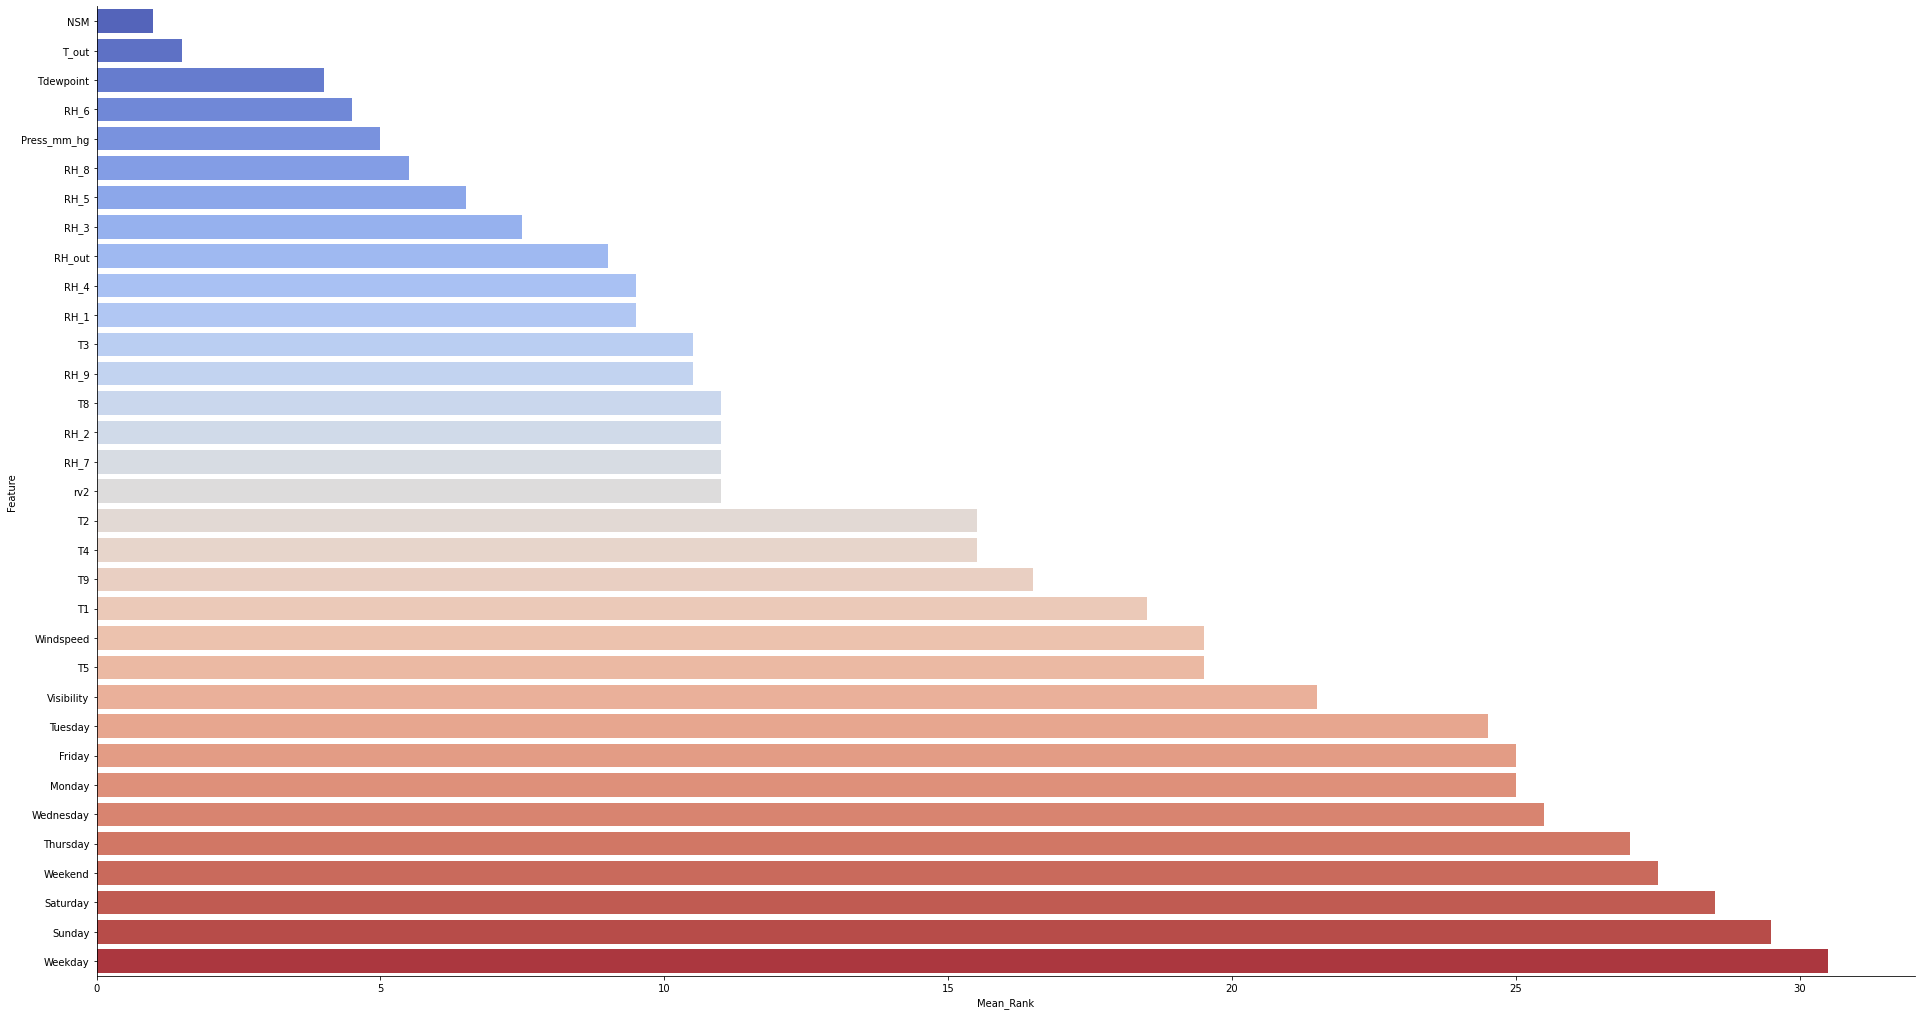

In [27]:
# Sort the dataframe as per Mean Rank
feature_df = feature_df.sort_values('Mean_Rank')
feature_df['Feature'] = feature_df.index

# Plot the ranking of the features
sns.factorplot(x='Mean_Rank', y='Feature', data = feature_df, kind="bar", size=14, aspect=1.9, palette='coolwarm');

In [28]:
feature_ranked_list = feature_df.index
len(feature_ranked_list)

33

In [29]:
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

def calculate_rms_randomforest(X_train, X_test, y_train, y_test, calculate_all=False):
    rf = RandomForestRegressor(n_estimators = 10)
    rf.fit(X_train, y_train)
    
    if calculate_all:
        # Predicting and Calculating the Metrices for Prediction of Testing Dataset
        prediction_test_rf = rf.predict(X_test)
        r2_test_rf = r2_score(y_test, prediction_test_rf)
        rms_test_rf = sqrt(mean_squared_error(y_test, prediction_test_rf))
        mae_test_rf = mean_absolute_error(y_test,prediction_test_rf)
        mape_test_rf = np.mean(np.abs((y_test - prediction_test_rf) / y_test)) * 100
        
        # Predicting and Calculating the Metrices for Prediction of Training Dataset
        prediction_train_rf = rf.predict(X_train)
        r2_train_rf = r2_score(y_train, prediction_train_rf)
        rms_train_rf = sqrt(mean_squared_error(y_train, prediction_train_rf))
        mae_train_rf = mean_absolute_error(y_train,prediction_train_rf)
        mape_train_rf = np.mean(np.abs((y_train - prediction_train_rf) / y_train)) * 100
        
        print('r2_train_rf: ', float("{0:.2f}".format(r2_train_rf)))
        print('r2_test_rf: ', float("{0:.2f}".format(r2_test_rf)))
        print('rms_train_rf: ', float("{0:.2f}".format(rms_train_rf)))
        print('rms_test_rf: ', float("{0:.2f}".format(rms_test_rf)))
        print('mae_train_rf: ', float("{0:.2f}".format(mae_train_rf)))
        print('mae_test_rf: ', float("{0:.2f}".format(mae_test_rf)))
        print('mape_train_rf: ', float("{0:.2f}".format(mape_train_rf)))
        print('mape_test_rf: ', float("{0:.2f}".format(mape_test_rf)))
    
    else:
        # Predicting and Calculating the Metrices for Prediction of Testing Dataset
        prediction_test_rf = rf.predict(X_test)
        r2_test_rf = r2_score(y_test, prediction_test_rf)
        rms_test_rf = sqrt(mean_squared_error(y_test, prediction_test_rf))       
        
        # Predicting and Calculating the Metrices for Prediction of Training Dataset
        prediction_train_rf = rf.predict(X_train)
        r2_train_rf = r2_score(y_train, prediction_train_rf)
        rms_train_rf = sqrt(mean_squared_error(y_train, prediction_train_rf))
        
        r2_train_rf =  float("{0:.2f}".format(r2_train_rf))
        r2_test_rf =  float("{0:.2f}".format(r2_test_rf))
        rms_train_rf = float("{0:.2f}".format(rms_train_rf))
        rms_test_rf = float("{0:.2f}".format(rms_test_rf))
        
        return rms_train_rf, rms_test_rf, r2_train_rf, r2_test_rf

In [30]:
df_forward_X_train = pd.DataFrame()
df_forward_X_test = pd.DataFrame()
var_count = 0
df_forward_rms_var_plot = pd.DataFrame(columns = ['no_of_var', 'RMS_Train', 'RMS_Test', 'R2_Train', 'R2_Test'])

In [31]:
for feature in feature_ranked_list:
    var_count = var_count + 1
    print(feature)
    df_forward_X_train = pd.concat([df_forward_X_train, X_train[feature]], axis=1)
    df_forward_X_test = pd.concat([df_forward_X_test, X_test[feature]], axis=1)
    
    rms_returned = calculate_rms_randomforest(df_forward_X_train, df_forward_X_test, y_train, y_test)
    rms_returned_list = [[var_count, rms_returned[0], rms_returned[1], rms_returned[2], rms_returned[3]]]
    
    df_forward_rms_var_plot = df_forward_rms_var_plot.append(pd.DataFrame(
        rms_returned_list, columns=['no_of_var', 'RMS_Train', 'RMS_Test', 'R2_Train', 'R2_Test']),ignore_index=True)

NSM
T_out
Tdewpoint
RH_6
Press_mm_hg
RH_8
RH_5
RH_3
RH_out
RH_4
RH_1
T3
RH_9
T8
RH_2
RH_7
rv2
T2
T4
T9
T1
Windspeed
T5
Visibility
Tuesday
Friday
Monday
Wednesday
Thursday
Weekend
Saturday
Sunday
Weekday


In [32]:
df_forward_rms_var_plot

,no_of_var,RMS_Train,RMS_Test,R2_Train,R2_Test
0,1,93.40,91.56,0.17,0.17
1,2,48.45,96.70,0.78,0.07
2,3,34.86,81.67,0.88,0.34
3,4,32.26,70.79,0.90,0.50
4,5,29.19,66.10,0.92,0.57
5,6,29.22,66.64,0.92,0.56
6,7,28.55,64.67,0.92,0.59
7,8,28.99,67.12,0.92,0.55
8,9,30.01,68.12,0.91,0.54
9,10,29.63,68.44,0.92,0.54


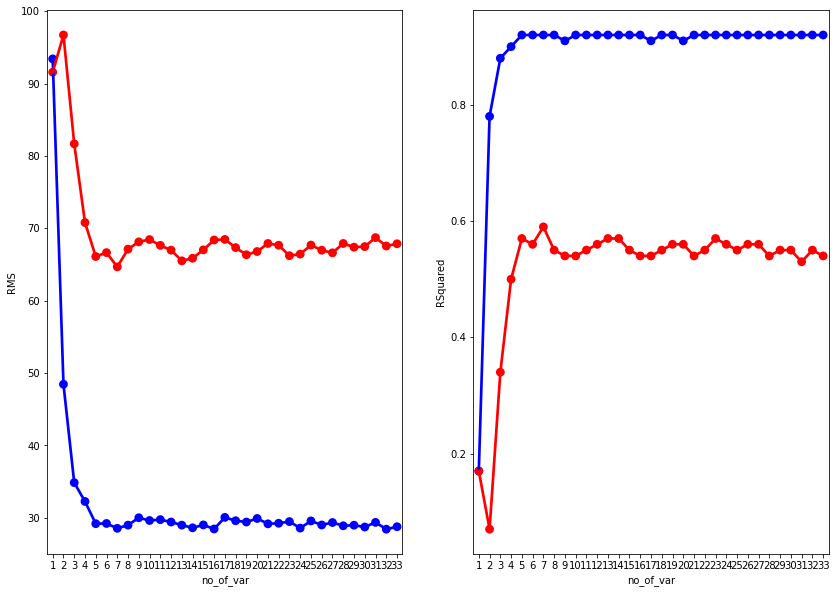

In [33]:
fig, (ax1, ax2) = plt.subplots(figsize=(14,10), ncols=2)
sns.pointplot(x='no_of_var', y='RMS_Train', data=df_forward_rms_var_plot, ax=ax1, color='blue', label='Train', linestyle='-')
sns.pointplot(x='no_of_var', y='RMS_Test', data=df_forward_rms_var_plot, ax=ax1, color='red', label='Test', linestyle='-')
sns.pointplot(x='no_of_var', y='R2_Train', data=df_forward_rms_var_plot, ax=ax2, color='blue', label='Train', linestyle='-')
sns.pointplot(x='no_of_var', y='R2_Test', data=df_forward_rms_var_plot, ax=ax2, color='red', label='Test', linestyle='-')
ax1.set_ylabel("RMS")
ax2.set_ylabel("RSquared");

In [34]:
df_forward_X_train_new = df_forward_X_train.iloc[:,0:4]
df_forward_X_test_new = df_forward_X_test.iloc[:,0:4]
calculate_rms_randomforest(df_forward_X_train_new, df_forward_X_test_new, y_train, y_test, calculate_all=True)

r2_train_rf:  0.9
r2_test_rf:  0.48
rms_train_rf:  31.93
rms_test_rf:  72.27
mae_train_rf:  14.72
mae_test_rf:  36.86
mape_train_rf:  15.43
mape_test_rf:  41.48


In [35]:
df_forward_X_train_new = df_forward_X_train.iloc[:,0:5]
df_forward_X_test_new = df_forward_X_test.iloc[:,0:5]
calculate_rms_randomforest(df_forward_X_train_new, df_forward_X_test_new, y_train, y_test, calculate_all=True)

r2_train_rf:  0.92
r2_test_rf:  0.56
rms_train_rf:  28.61
rms_test_rf:  66.74
mae_train_rf:  12.68
mae_test_rf:  31.97
mape_train_rf:  12.84
mape_test_rf:  33.83


In [36]:
df_forward_X_train_new = df_forward_X_train.iloc[:,0:6]
df_forward_X_test_new = df_forward_X_test.iloc[:,0:6]
calculate_rms_randomforest(df_forward_X_train_new, df_forward_X_test_new, y_train, y_test, calculate_all=True)

r2_train_rf:  0.92
r2_test_rf:  0.55
rms_train_rf:  29.67
rms_test_rf:  67.16
mae_train_rf:  13.09
mae_test_rf:  32.0
mape_train_rf:  13.19
mape_test_rf:  33.33


In [37]:
df_forward_X_train_new = df_forward_X_train.iloc[:,0:8]
df_forward_X_test_new = df_forward_X_test.iloc[:,0:8]
calculate_rms_randomforest(df_forward_X_train_new, df_forward_X_test_new, y_train, y_test, calculate_all=True)

r2_train_rf:  0.92
r2_test_rf:  0.54
rms_train_rf:  28.7
rms_test_rf:  68.11
mae_train_rf:  12.51
mae_test_rf:  31.91
mape_train_rf:  12.47
mape_test_rf:  33.38


In [38]:
df_forward_X_train_new = df_forward_X_train.iloc[:,0:10]
df_forward_X_test_new = df_forward_X_test.iloc[:,0:10]
calculate_rms_randomforest(df_forward_X_train_new, df_forward_X_test_new, y_train, y_test, calculate_all=True)

r2_train_rf:  0.92
r2_test_rf:  0.54
rms_train_rf:  29.05
rms_test_rf:  67.9
mae_train_rf:  12.6
mae_test_rf:  31.8
mape_train_rf:  12.35
mape_test_rf:  32.74


In [39]:
df_forward_X_train_new = df_forward_X_train.iloc[:,0:11]
df_forward_X_test_new = df_forward_X_test.iloc[:,0:11]
calculate_rms_randomforest(df_forward_X_train_new, df_forward_X_test_new, y_train, y_test, calculate_all=True)

r2_train_rf:  0.92
r2_test_rf:  0.56
rms_train_rf:  29.27
rms_test_rf:  66.47
mae_train_rf:  12.82
mae_test_rf:  31.53
mape_train_rf:  12.52
mape_test_rf:  32.1


In [40]:
import statsmodels.api as sm

def stepwise_selection(X, y, feature_list=[], threshold_in=0.01, threshold_out = 0.05, verbose=True, search=0):
    '''
    Forward Backward feature selection using p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list with target feature
        feature_list - list of features to start with (column names of X)
        threshold_in - include a feature if p-value < threshold_in
        threshold_out - exclude a feature if p-value > threshold_out
        verbose - Boolean: To print the sequence of inclusions and exclusions
        search - takes 0 (Exhaustive) or 1(Forward) or 2(Backward) as parameter
    Returns: List of Selected Features 
    
    Note: Avoid infinite looping setting threshold_in < threshold_out to 
    '''
    selected_feature_list = list(feature_list)
    changed = True

    # Exhuastive Search
    if search==0:
        while changed:

            changed = False

            # Forward Step
            excluded_features = list(set(X.columns) - set(selected_feature_list))
            new_pvalue = pd.Series(index = excluded_features)

            for new_column in excluded_features:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[selected_feature_list + [new_column]]))).fit()
                new_pvalue[new_column] = model.pvalues[new_column]

            best_pvalue = new_pvalue.min()

            if best_pvalue < threshold_in:
                best_feature = new_pvalue.argmin()
                selected_feature_list.append(best_feature)

                changed = True
                
                if verbose:
                    print('Adding {:30} with p-value {:.6}'.format(best_feature, best_pvalue))

            # Backward Step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[selected_feature_list]))).fit()

            # Using all Coefficient except Intercept
            pvalues_back = model.pvalues.iloc[1:]

            # NaN if pvalues_back is empty
            worst_pval = pvalues_back.max() 
            if worst_pval > threshold_out:
                changed = True
                worst_feature = pvalues_back.argmax()
                selected_feature_list.remove(worst_feature)
                if verbose:
                    print('Dropping {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            
            if not changed:
                break

        return selected_feature_list


    # Forward Search
    if search==1:
        while changed:

            changed = False

            # Forward Step
            excluded_features = list(set(X.columns) - set(selected_feature_list))
            new_pvalue = pd.Series(index = excluded_features)

            for new_column in excluded_features:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[selected_feature_list + [new_column]]))).fit()
                new_pvalue[new_column] = model.pvalues[new_column]

            best_pvalue = new_pvalue.min()

            if best_pvalue < threshold_in:
                best_feature = new_pvalue.argmin()
                selected_feature_list.append(best_feature)

                changed = True
                
                if verbose:
                    print('Adding {:30} with p-value {:.6}'.format(best_feature, best_pvalue))

        return selected_feature_list


    # Backward Search
    if search==2:

        all_feature_list = list(X.columns)
        
        while changed:

            changed = False
            
            # Backward Step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[all_feature_list]))).fit()

            # Using all Coefficient except Intercept
            pvalues_back = model.pvalues.iloc[1:]

            # NaN if pvalues_back is empty
            worst_pval = pvalues_back.max() 
            if worst_pval > threshold_out:
                changed = True
                worst_feature = pvalues_back.argmax()
                all_feature_list.remove(worst_feature)
                if verbose:
                    print('Dropping {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            
            if not changed:
                break

        return all_feature_list

In [41]:
# selected_features = stepwise_selection(X, y, search=0)
# print('Resulting Features for Exhaustive Search:')
# print(selected_features)

In [42]:
# selected_features = stepwise_selection(X, y, search=2)
# print('Resulting Features for Forward Search:')
# print(selected_features)

In [43]:
#feature_df.index
final_selected_cols = ['Appliances', 'NSM', 'T_out', 'Tdewpoint', 'RH_6', 'Press_mm_hg']

In [44]:
#Exporting new dataset with selected columns
df_upload = df[final_selected_cols]
df_upload.to_csv('energydata_complete_hyperpara.csv', index=False)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [46]:
# Change X and y to its values
X_boruta = X.values
y_boruta = y.values

# Define random forest classifier, with utilising all cores and sampling in proportion to y labels
rfc = RandomForestClassifier(n_jobs=-1)
 
# Define Boruta feature selection method
feature_selector = BorutaPy(rfc, n_estimators='auto', verbose=2)
 
# Find all relevant features
feature_selector.fit(X_boruta, y_boruta)
 
# Check ranking of features
feature_df['Boruta_Rank'] = feature_selector.ranking_
feature_df

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	18
Iteration: 	9 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	18
Iteration: 	10 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	18
Iteration: 	11 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	18
Iteration: 	12 / 100
Confirmed: 	11
Tentative: 	4
Rejected: 	18
Iteration: 	13 / 100
Confirmed: 	11
Tentative: 	4
Rejected: 	18
Iteration: 	14 / 100
Confirmed: 	11
Tentative: 	4
Rejected: 	18
Iteration: 	15 / 100
Confirmed: 	11
Tentative: 	4
Rejected: 	18
Iteration: 	16 / 100
Confirmed: 	11
Tentative: 	4
Reject

,RFE_LR_Rank,RFE_Lasso_Rank,RFE_RF_Rank,Feature_Imp_ETC,Feature_Imp_ETC_Rank,Mean_Rank,Feature,Boruta_Rank
NSM,31,22,1,0.061548,1,1.0,NSM,8
T_out,20,30,1,0.044018,2,1.5,T_out,1
Tdewpoint,18,23,5,0.043903,3,4.0,Tdewpoint,1
RH_6,29,17,8,0.044355,1,4.5,RH_6,2
Press_mm_hg,26,19,1,0.041852,9,5.0,Press_mm_hg,7
RH_8,10,5,10,0.045817,1,5.5,RH_8,1
RH_5,25,15,2,0.041480,11,6.5,RH_5,4
RH_3,13,8,3,0.040431,12,7.5,RH_3,6
RH_out,28,21,12,0.042744,6,9.0,RH_out,9
RH_4,21,24,6,0.039948,13,9.5,RH_4,1


In [47]:
# 


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [49]:
df_loaded = pd.read_csv(r"C:\Users\sachi.mehta\Data Science\Energy consumption\Model2\energydata_complete_hyperpara.csv")
df = df_loaded

# Creating Metrics Dataframe
metrics_df = pd.DataFrame(index = ['n_estimators', 'RSquared_train', 'RSquared_test', 'RMS_train', 'RMS_test', 'MAE_train', 'MAE_test', 'MAPE_train', 'MAPE_test'])

In [50]:
# Function to print metrics
def print_training_metrics(**kwargs):
    for name, value in kwargs.items():
        value = float("{0:.2f}".format(value))
        print('{0} for Training Dataset is: {1}'.format(name, value))
def print_testing_metrics(**kwargs):
    for name, value in kwargs.items():
        value = float("{0:.2f}".format(value))
        print('{0} for Testing Dataset is: {1}'.format(name, value))

# Function to print and add metrics to dataframe
def print_metrics(df, model, estimators, r2_train, rms_train, mae_train, mape_train, r2_test, rms_test, mae_test, mape_test):
    #print('R Squared for Training Data:',float("{0:.2f}".format(r2_train)))
    #print('R Squared for Testing Data:',float("{0:.2f}".format(r2_test)))
    #print('RMS for Training Data:',float("{0:.2f}".format(rms_train)))
    #print('RMS for Testing Data:',float("{0:.2f}".format(rms_test)))
    #print('MAE for Training Data:',float("{0:.2f}".format(mae_train)))
    #print('MAE for Testing Data:',float("{0:.2f}".format(mae_test)))
    #print('MAPE for Training Data:',float("{0:.2f}".format(mape_train)))
    #print('MAPE for Testing Data:',float("{0:.2f}".format(mape_test)))
    
    model_name = str.join('_', (model, str(estimators)))
    df[model_name] = [estimators,
                 float("{0:.2f}".format(r2_train)), float("{0:.2f}".format(r2_test)),
                 float("{0:.2f}".format(rms_train)), float("{0:.2f}".format(rms_test)),
                 float("{0:.2f}".format(mae_train)), float("{0:.2f}".format(mae_test)),
                 float("{0:.2f}".format(mape_train)), float("{0:.2f}".format(mape_test))]
    return df

In [51]:
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

def model_randomforest(X_train, y_train, metrics_df, estimators = 10):
    rf = RandomForestRegressor(n_estimators = estimators)
    rf.fit(X_train, y_train)
    
    # Predicting and Calculating the Metrices for Prediction of Testing Dataset
    prediction_test_rf = rf.predict(X_test)
    r2_test_rf = r2_score(y_test, prediction_test_rf)
    rms_test_rf = sqrt(mean_squared_error(y_test, prediction_test_rf))
    mae_test_rf = mean_absolute_error(y_test,prediction_test_rf)
    mape_test_rf = np.mean(np.abs((y_test - prediction_test_rf) / y_test)) * 100
    
    # Predicting and Calculating the Metrices for Prediction of Training Dataset
    prediction_train_rf = rf.predict(X_train)
    r2_train_rf = r2_score(y_train, prediction_train_rf)
    rms_train_rf = sqrt(mean_squared_error(y_train, prediction_train_rf))
    mae_train_rf = mean_absolute_error(y_train,prediction_train_rf)
    mape_train_rf = np.mean(np.abs((y_train - prediction_train_rf) / y_train)) * 100
    
    # Printing the training and testing metrices
    print('Random Forest Model\n')
    metrics_df = print_metrics(metrics_df, 'RF_Model', estimators, r2_train_rf, rms_train_rf, mae_train_rf, mape_train_rf, r2_test_rf, rms_test_rf, mae_test_rf, mape_test_rf)
    return metrics_df

In [52]:
metrics_df = model_randomforest(X_train, y_train, metrics_df, estimators = 10)
metrics_df

Random Forest Model



,RF_Model_10
n_estimators,10.00
RSquared_train,0.92
RSquared_test,0.55
RMS_train,29.15
RMS_test,67.01
MAE_train,12.69
MAE_test,31.67
MAPE_train,12.45
MAPE_test,32.40


In [53]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor()
scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

R2: -0.71 (+/- 2.38)


In [54]:
for i in range(10, 510, 10):
    metrics_df = model_randomforest(X_train, y_train, metrics_df, estimators = i)

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest Model

Random Forest

In [55]:
metrics_df

,RF_Model_10,RF_Model_20,RF_Model_30,RF_Model_40,RF_Model_50,RF_Model_60,RF_Model_70,RF_Model_80,RF_Model_90,RF_Model_100,...,RF_Model_410,RF_Model_420,RF_Model_430,RF_Model_440,RF_Model_450,RF_Model_460,RF_Model_470,RF_Model_480,RF_Model_490,RF_Model_500
n_estimators,10.00,20.00,30.00,40.00,50.00,60.00,70.00,80.00,90.00,100.00,...,410.00,420.00,430.00,440.00,450.00,460.00,470.00,480.00,490.00,500.00
RSquared_train,0.92,0.93,0.94,0.94,0.94,0.94,0.94,0.94,0.94,0.94,...,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95
RSquared_test,0.58,0.59,0.60,0.59,0.60,0.60,0.60,0.60,0.60,0.60,...,0.61,0.61,0.61,0.61,0.61,0.60,0.61,0.61,0.61,0.61
RMS_train,29.28,26.48,25.84,25.41,24.52,24.60,24.72,24.56,24.37,24.10,...,23.92,23.86,23.83,23.91,23.84,23.82,23.85,23.78,23.77,23.72
RMS_test,65.13,64.04,63.71,63.94,63.19,63.60,63.35,63.41,63.65,63.67,...,62.83,62.91,62.99,63.10,63.10,63.16,63.07,63.02,63.05,62.91
MAE_train,12.77,11.91,11.78,11.65,11.30,11.44,11.37,11.36,11.31,11.25,...,11.13,11.12,11.09,11.09,11.09,11.06,11.12,11.13,11.08,11.06
MAE_test,30.96,30.10,29.91,29.92,29.52,29.50,29.75,29.86,29.56,29.60,...,29.34,29.28,29.29,29.33,29.24,29.35,29.30,29.33,29.29,29.21
MAPE_train,12.55,11.77,11.63,11.49,11.14,11.30,11.10,11.13,11.18,11.10,...,10.92,10.93,10.92,10.94,10.91,10.89,10.96,10.98,10.95,10.89
MAPE_test,31.71,31.20,30.76,30.99,30.45,30.33,30.76,30.76,30.37,30.54,...,30.25,30.15,30.16,30.22,30.03,30.13,30.24,30.27,30.18,30.08


In [56]:
import pandas as pd
import time
import numpy as np
import datetime
import logging
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [57]:
logfilename = 'pipeLine_logging.txt'
logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')
logging.debug('Program Started')

In [58]:
logging.debug('Loading Data into Dataframe')
try :  
    df_loaded = pd.read_csv(r"C:\Users\sachi.mehta\Data Science\Energy consumption\Model2\Machine-Learning-with-Energy-Dataset-master\Part7_Final_Pipeline\energydata_complete.csv")
    df = df_loaded
    logging.debug('Data Size'+str(df.shape) )
    
except :
    logging.ERROR('Data logging failed')

In [59]:
logging.debug("Tranforming date time")
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S', utc=True)

In [60]:
logging.debug('Creating Column NSM, week_status, day_of_week')
df['NSM'] = df.date.apply(lambda x: x.hour*3600 + x.minute*60 +x.second)
df['day_of_week'] = df.date.apply(lambda x: x.dayofweek)
df['week_status'] = df.day_of_week.apply(lambda x: 0 if (x == 5 or x == 6) else 1)

In [61]:
shape_bool = df.date.nunique() == df.shape[0]
logging.debug('Checking if the date column is unique for each and every row to be: ')
logging.debug(shape_bool)

In [62]:
all_columns = df.columns.tolist()

logging.debug('Detecting Outliers for Each variable')
df_describe = df.describe().T

logging.debug('Calculating Interquartile Range, Major Outlier and Minor Outlier')
df_describe['Interquartile Range'] = 1.5*(df_describe['75%'] - df_describe['25%'])
df_describe['Major Outlier'] = (df_describe['75%'] + df_describe['Interquartile Range'])
df_describe['Minor Outlier'] = (df_describe['25%'] - df_describe['Interquartile Range'])

logging.debug('Creating function to remove outliers')
def remove_outlier(df, variable):
    major_o = df_describe.loc[variable,'Major Outlier']
    minor_o = df_describe.loc[variable,'Minor Outlier']
    df = df.drop(df[(df[variable]>major_o) | (df[variable]<minor_o)].index)
    return df

outlier_column_list = [x for x in all_columns 
                       if x not in ('date', 'Appliances', 'lights')]

logging.debug('Removing Outliers')
for column_name in outlier_column_list:
    df = remove_outlier(df, column_name)

In [63]:
dropped = ((df_loaded.shape[0] - df.shape[0])/df_loaded.shape[0])*100
logging.debug('Percentage of Data Dropped: ')
logging.debug(dropped)

In [64]:
logging.debug('Transformation of WeekStatus and Days_of_week columns')
week_status = pd.get_dummies(df['week_status'], prefix = 'week_status')
day_of_week = pd.get_dummies(df['day_of_week'], prefix = 'day_of_week')

logging.debug('Concat dummy variable dataframe to the main dataframe')
df = pd.concat((df,week_status),axis=1)
df = pd.concat((df,day_of_week),axis=1)

logging.debug('Droppin the WeekStatus and Day_of_week column')
df = df.drop(['week_status','day_of_week'],axis=1)

In [65]:
logging.debug('Renaming the column of dummy variables')
df = df.rename(columns={'week_status_0': 'Weekend', 'week_status_1': 'Weekday',
                   'day_of_week_0': 'Monday', 'day_of_week_1': 'Tuesday', 'day_of_week_2': 'Wednesday',
                  'day_of_week_3': 'Thursday', 'day_of_week_4': 'Friday', 'day_of_week_5': 'Saturday',
                  'day_of_week_6': 'Sunday'})

In [66]:
logging.debug('Redefining the Appliances column, adding the consumption of lights and dropping it')
df['Appliances'] = df['Appliances'] + df['lights']
df = df.drop(['lights'],axis=1)
df = df.drop(['date'],axis=1)

In [67]:
logging.debug('Loading libraries for feature selection and prediction')
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

X = df.drop(['Appliances'],axis=1)
y = df['Appliances']

logging.debug('Splitting for Feature Selection')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model_rf = RandomForestRegressor(n_estimators=10)

logging.debug('Feature selection as part of a pipeline')
clf = Pipeline([('feature_selection', RFE(model_rf, n_features_to_select = 5)),
                ('classification', RandomForestRegressor())])

logging.debug('Fitting the random forest')
clf.fit(X_train, y_train)

logging.debug('Predicting and Calculating the Metrices for Prediction of Testing Dataset')
prediction_test_rf = clf.predict(X_test)
r2_test_rf = r2_score(y_test, prediction_test_rf)
rms_test_rf = sqrt(mean_squared_error(y_test, prediction_test_rf))
mae_test_rf = mean_absolute_error(y_test,prediction_test_rf)
mape_test_rf = np.mean(np.abs((y_test - prediction_test_rf) / y_test)) * 100
       
logging.debug('Predicting and Calculating the Metrices for Prediction of Training Dataset')
prediction_train_rf = clf.predict(X_train)
r2_train_rf = r2_score(y_train, prediction_train_rf)
rms_train_rf = sqrt(mean_squared_error(y_train, prediction_train_rf))
mae_train_rf = mean_absolute_error(y_train,prediction_train_rf)
mape_train_rf = np.mean(np.abs((y_train - prediction_train_rf) / y_train)) * 100
  
logging.debug('Printing Metrices')
print('r2_train_rf: ', float("{0:.2f}".format(r2_train_rf)))
print('r2_test_rf: ', float("{0:.2f}".format(r2_test_rf)))
print('rms_train_rf: ', float("{0:.2f}".format(rms_train_rf)))
print('rms_test_rf: ', float("{0:.2f}".format(rms_test_rf)))
print('mae_train_rf: ', float("{0:.2f}".format(mae_train_rf)))
print('mae_test_rf: ', float("{0:.2f}".format(mae_test_rf)))
print('mape_train_rf: ', float("{0:.2f}".format(mape_train_rf)))
print('mape_test_rf: ', float("{0:.2f}".format(mape_test_rf)))

r2_train_rf:  0.94
r2_test_rf:  0.59
rms_train_rf:  25.3
rms_test_rf:  67.78
mae_train_rf:  11.88
mae_test_rf:  31.77
mape_train_rf:  11.77
mape_test_rf:  30.52
